In [4]:
import nltk
from lxml import etree
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 6]

In [5]:
class Text(): 
    def __init__(self, filename): 
        self.tree = etree.parse(filename)
        self.textEnd = sum(1 for line in open(filename))
        self.textBegin = self.tree.find('.//text').sourceline
        
    def getLang(self, lang): 
        # map XML built-in namespace so we can search for xml:lang
        nsmap = {"xml": "http://www.w3.org/XML/1998/namespace"}
        xpath = './/seg[@xml:lang="%s"]' % lang
        matches = self.tree.findall(xpath, namespaces=nsmap) 
        return [match.sourceline for match in matches]
    
    def showLang(self, lang): 
        lines = self.getLang(lang)
        pd.Series(self.makeBuckets(lines)).plot(kind="bar")
    
    def showLangs(self, langs): 
        langDict = {}
        for lang in langs: 
            lines = self.getLang(lang)
            results = self.makeBuckets(lines)
            #print('results for lang: %s: %s' % (lang, results))
            langDict[lang] = results
        pd.DataFrame(langDict).plot()
    
    def getFeature(self, feature): 
        xpath = './/seg[@type="%s"]' % feature
        xpath2 = './/lg[@type="%s"]' % feature
        matches1 = self.tree.findall(xpath) 
        matches2 = self.tree.findall(xpath2) 
        matches = matches1 + matches2
        return [match.sourceline for match in matches]
    
    def showFeatures(self, features):
        featureDict = {}
        for feature in features:
            lines = self.getFeature(feature)
            results = self.makeBuckets(lines)
            featureDict[feature] = results
        pd.DataFrame(featureDict).plot()
        
        
    def makeBuckets(self, lines, numBuckets=20): 
        bucketSize = (self.textEnd - self.textBegin) / numBuckets
        buckets = {}
        for bucket in range(0, numBuckets): 
            lower = self.textBegin + (bucket * bucketSize)
            upper = lower + bucketSize
            #print("Looking for lines between %s and %s" % (lower, upper))
            buckets[bucket] = sum(1 for line in lines if line > lower and line < upper) 
        return buckets


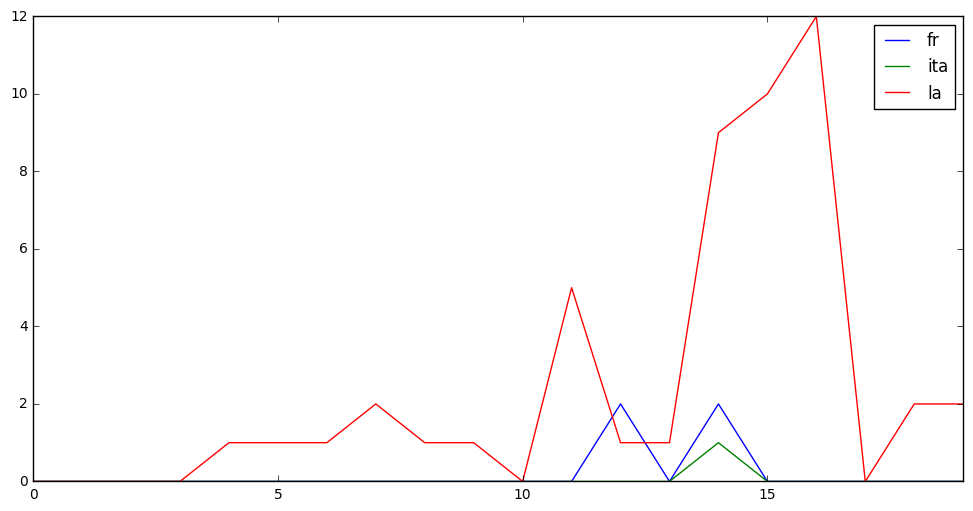

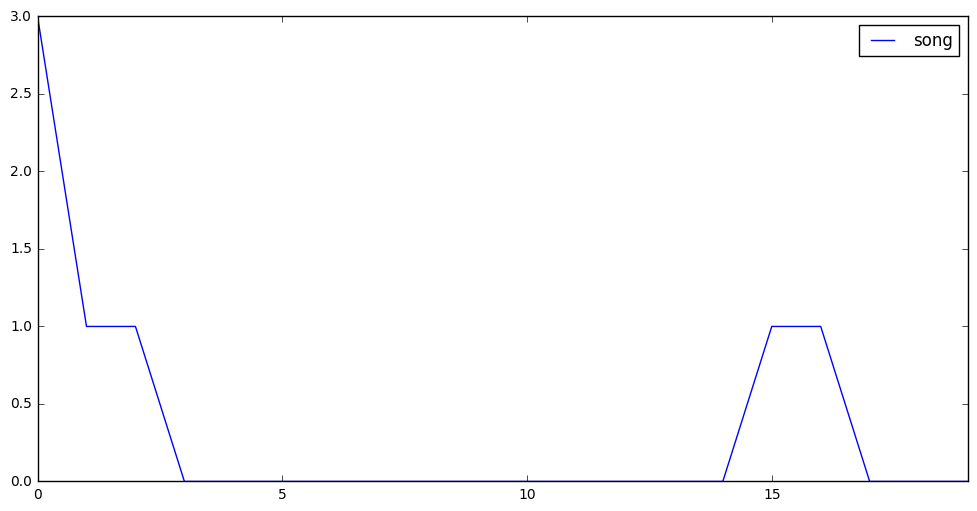

In [7]:
t = Text('../portrait.xml')
langDict = t.showLangs(['la', 'fr', 'ita'])
t.showFeatures(['song'])